In [12]:
import pandas as pd
import numpy as np
import os
import statsmodels.formula.api as smf
import scipy.stats
import math
import warnings
import matplotlib.pyplot as plt

from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates

In [2]:
warnings.filterwarnings('ignore')
infile = '9ofkuwkebi2jixwy.csv'
tba = pd.read_csv(infile)
tba.head(10)

,cusip_id,bond_sym_id,company_symbol,bsym,trd_exctn_dt,trd_exctn_tm,sub_prd_type,trans_dt,msg_seq_nb,trc_st,...,rptd_low_pr,rptd_last_pr,orig_dis_dt,orig_msg_seq_nb,function,sttl_dt,factor,rptg_party_type,contra_party_type,ATS_indicator
0,02R050614,FMCC3516075,FMCC,BBG001LK2284,20220104,16:13:06,TBA,20220128,6341,O,...,0.000000,0.000000,20220104.0,13204.0,N,20220131,0.0,D,C,NaN
1,02R050614,FMCC3516075,FMCC,BBG001LK2284,20220104,16:13:06,TBA,20220104,12506,M,...,NaN,NaN,NaN,NaN,NaN,20220131,0.0,D,C,NaN
2,02R050614,FMCC3516075,FMCC,BBG001LK2284,20220104,16:13:06,TBA,20220104,13204,O,...,110.476562,110.476562,20220104.0,12506.0,N,20220131,0.0,D,C,NaN
3,02R062627,FMCC3516513,FMCC,BBG001LJXN78,20220127,15:57:08,TBA,20220228,3509,O,...,0.000000,0.000000,20220218.0,5209.0,N,20220228,0.0,D,C,NaN
4,02R062627,FMCC3516513,FMCC,BBG001LJXN78,20220127,15:57:08,TBA,20220218,5209,O,...,0.000000,0.000000,20220127.0,11787.0,N,20220228,0.0,D,C,NaN
5,02R062627,FMCC3516513,FMCC,BBG001LJXN78,20220127,15:57:08,TBA,20220127,11787,M,...,NaN,NaN,NaN,NaN,NaN,20220228,0.0,D,C,NaN
6,02R042660,FMCC3518169,FMCC,BBG001LK62B6,20220623,12:21:00,TBA,20220630,3857,M,...,NaN,NaN,NaN,NaN,NaN,20220630,0.0,D,C,NaN
7,02R050663,FMCC3518175,FMCC,BBG001LK22H4,20220623,12:17:14,TBA,20220630,3596,M,...,NaN,NaN,NaN,NaN,NaN,20220630,0.0,D,C,NaN
8,02R042678,FMCC3518589,FMCC,BBG001LK6299,20220614,10:53:56,TBA,20220614,2790,M,...,NaN,NaN,NaN,NaN,NaN,20220617,1.0,D,C,NaN
9,02R042678,FMCC3518589,FMCC,BBG001LK6299,20220614,10:53:56,TBA,20220614,2791,M,...,NaN,NaN,NaN,NaN,NaN,20220617,1.0,D,C,NaN


In [3]:
tba.tail()

,cusip_id,bond_sym_id,company_symbol,bsym,trd_exctn_dt,trd_exctn_tm,sub_prd_type,trans_dt,msg_seq_nb,trc_st,...,rptd_low_pr,rptd_last_pr,orig_dis_dt,orig_msg_seq_nb,function,sttl_dt,factor,rptg_party_type,contra_party_type,ATS_indicator
1982694,01F0104B3,UMBS5218536,UMBS,NaN,20211109,15:15:40,TBA,20211109,9448,M,...,NaN,NaN,NaN,NaN,NaN,20211116,0.0,D,C,NaN
1982695,01F0104C1,UMBS5218537,UMBS,NaN,20211201,10:21:46,TBA,20211201,1681,M,...,NaN,NaN,NaN,NaN,NaN,20211216,0.0,D,C,NaN
1982696,01F0104C1,UMBS5218537,UMBS,NaN,20211201,16:21:29,TBA,20211201,10616,M,...,NaN,NaN,NaN,NaN,NaN,20211216,0.0,D,C,NaN
1982697,01F0104C1,UMBS5218537,UMBS,NaN,20211216,8:08:44,TBA,20211216,298,M,...,NaN,NaN,NaN,NaN,NaN,20211220,0.0,D,C,NaN
1982698,01F0104C1,UMBS5218537,UMBS,NaN,20211216,8:08:44,TBA,20211216,318,O,...,0.0,0.0,20211216.0,298.0,N,20211220,0.0,D,C,NaN


In [4]:
print(tba['company_symbol'].value_counts().to_latex())

\begin{tabular}{lr}
\toprule
{} &  company\_symbol \\
\midrule
UMBS &         1522938 \\
GNMB &          445662 \\
FNMA &            6825 \\
GNMA &            6650 \\
FMCC &             337 \\
SMBA &             287 \\
\bottomrule
\end{tabular}



In [5]:
n_bonds = trace_tba['bond_sym_id'].nunique()
print('Number of bond symbols traded = ',n_bonds)

NameError: name 'trace_tba' is not defined

In [6]:
len(tba)

1982699

In [7]:
print(tba.columns.tolist())

['cusip_id', 'bond_sym_id', 'company_symbol', 'bsym', 'trd_exctn_dt', 'trd_exctn_tm', 'sub_prd_type', 'trans_dt', 'msg_seq_nb', 'trc_st', 'cmsn_trd', 'remuneration', 'ascii_rptd_vol_tx', 'frmt_cd', 'rptd_pr', 'asof_cd', 'sale_cndtn_cd', 'sale_cndtn2_cd', 'spcl_trd_fl', 'diss_rptg_side_cd', 'side', 'chng_cd', 'rptd_high_pr', 'rptd_low_pr', 'rptd_last_pr', 'orig_dis_dt', 'orig_msg_seq_nb', 'function', 'sttl_dt', 'factor', 'rptg_party_type', 'contra_party_type', 'ATS_indicator']


In [8]:
tba['rptd_pr']

0          110.476562
1          110.476562
2          110.476562
3          111.531250
4          111.531250
              ...    
1982694     98.296875
1982695     97.625000
1982696     97.875000
1982697     97.906250
1982698     97.906250
Name: rptd_pr, Length: 1982699, dtype: float64

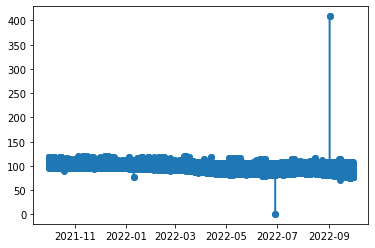

In [27]:
#price_date = tba['trd_exctn_dt']
#price_close = tba['rptd_pr']
plt.plot_date(price_date, price_close, linestyle='solid')

In [24]:
data = pd.read_csv(infile)
data['Date'] = pd.to_datetime(data['trd_exctn_dt'], format="%Y%m%d")
data.sort_values('Date', inplace=True)
price_date = data['Date']

AttributeError: 'Line2D' object has no property 'trendline'

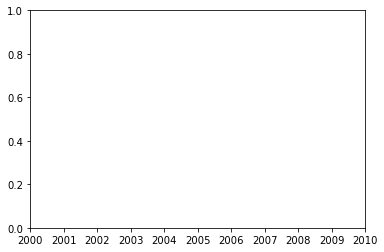

In [50]:
price_close = data['rptd_pr']
plt.plot_date(price_date, price_close, linestyle='solid', trendline='ols')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.title('TBA Prices')
plt.xlabel('Date')
plt.ylabel('Reported Prices')

plt.show()

In [23]:
price_date.tail()

894340   2022-09-30
894341   2022-09-30
894342   2022-09-30
894328   2022-09-30
913018   2022-09-30
Name: Date, dtype: datetime64[ns]

Text(0, 0.5, 'Reported Prices')

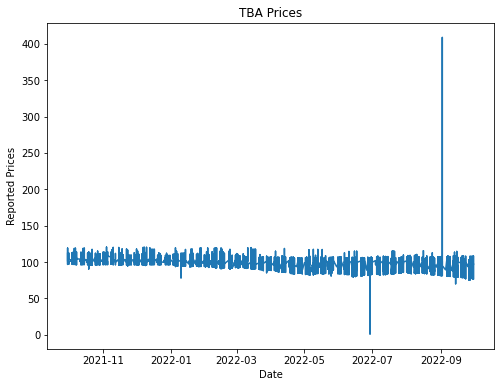

In [35]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(price_date, price_close)
plt.title('TBA Prices')
plt.xlabel('Date')
plt.ylabel('Reported Prices')

In [83]:
df2 = pd.DataFrame().assign(DATE=data['Date'], price=data['rptd_pr'])
print(df2)

              DATE       price
722398  2021-09-30  111.710937
1847005 2021-09-30  100.078125
1847004 2021-09-30  100.074218
1847003 2021-09-30  100.062500
1847002 2021-09-30  100.062500
...            ...         ...
894340  2022-09-30   90.498046
894341  2022-09-30   90.554687
894342  2022-09-30   90.519531
894328  2022-09-30   90.570312
913018  2022-09-30   96.773437

[1982699 rows x 2 columns]


In [84]:
df2.head()

,DATE,price
722398,2021-09-30,111.710937
1847005,2021-09-30,100.078125
1847004,2021-09-30,100.074218
1847003,2021-09-30,100.062500
1847002,2021-09-30,100.062500


In [85]:
cols = df2.columns.difference(['Date'])

In [86]:
df2[cols] = df2[cols].astype(float)

TypeError: Cannot cast DatetimeArray to dtype float64

In [87]:
df = df2.resample('d', on='DATE').mean().dropna(how='all')
print (df)

                 price
DATE                  
2021-09-30  102.434092
2021-10-01  102.507786
2021-10-03  102.292969
2021-10-04  102.520522
2021-10-05  102.535979
...                ...
2022-09-26   94.538463
2022-09-27   93.414480
2022-09-28   94.793450
2022-09-29   93.881533
2022-09-30   93.860982

[293 rows x 1 columns]


In [88]:
df.reset_index(inplace=True)
df.head()

,DATE,price
0,2021-09-30,102.434092
1,2021-10-01,102.507786
2,2021-10-03,102.292969
3,2021-10-04,102.520522
4,2021-10-05,102.535979


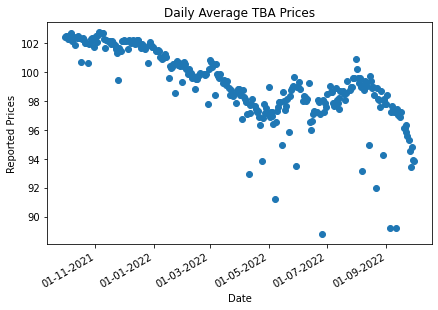

In [69]:
Date = df['Date']
price = df['price']
plt.plot_date(Date, price)
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.title('Daily Average TBA Prices')
plt.xlabel('Date')
plt.ylabel('Reported Prices')



plt.show()

# Looking at Mortgage Interest Rates

In [60]:
warnings.filterwarnings('ignore')
infile = 'MORTGAGE30US.csv'
mtg30 = pd.read_csv(infile)
mtg30.head(10)

,DATE,MORTGAGE30US
0,2021-08-05,2.77
1,2021-08-12,2.87
2,2021-08-19,2.86
3,2021-08-26,2.87
4,2021-09-02,2.87
5,2021-09-09,2.88
6,2021-09-16,2.86
7,2021-09-23,2.88
8,2021-09-30,3.01
9,2021-10-07,2.99


In [73]:
mtg30 = mtg30.drop(mtg30.index[range(3)])

In [91]:

mtg30["DATE"] = pd.to_datetime(mtg30["DATE"])

mtg30.head(10)

,DATE,MORTGAGE30US
8,2021-09-30,3.01
9,2021-10-07,2.99
10,2021-10-14,3.05
11,2021-10-21,3.09
12,2021-10-28,3.14
13,2021-11-04,3.09
14,2021-11-10,2.98
15,2021-11-18,3.10
16,2021-11-24,3.10
17,2021-12-02,3.11


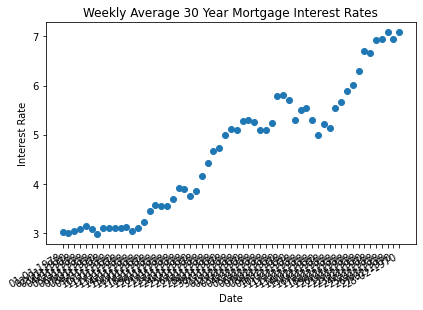

In [76]:
Date = mtg30['DATE']
mtg = mtg30['MORTGAGE30US']
plt.plot_date(Date, mtg)
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.title('Weekly Average 30 Year Mortgage Interest Rates')
plt.xlabel('Date')
plt.ylabel('Interest Rate')



plt.show()

In [77]:
warnings.filterwarnings('ignore')
infile = 'MORTGAGE15US.csv'
mtg15 = pd.read_csv(infile)
mtg15.head(10)

,DATE,MORTGAGE15US
0,2021-08-05,2.10
1,2021-08-12,2.15
2,2021-08-19,2.16
3,2021-08-26,2.17
4,2021-09-02,2.18
5,2021-09-09,2.19
6,2021-09-16,2.12
7,2021-09-23,2.15
8,2021-09-30,2.28
9,2021-10-07,2.23


In [78]:
mtg15 = mtg15.drop(mtg15.index[range(8)])

In [90]:
mtg15["DATE"] = pd.to_datetime(mtg15["DATE"])
mtg15.head(10)


,DATE,MORTGAGE15US
8,2021-09-30,2.28
9,2021-10-07,2.23
10,2021-10-14,2.30
11,2021-10-21,2.33
12,2021-10-28,2.37
13,2021-11-04,2.35
14,2021-11-10,2.27
15,2021-11-18,2.39
16,2021-11-24,2.42
17,2021-12-02,2.39


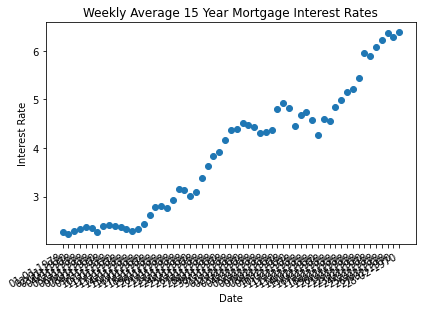

In [81]:
Date = mtg15['DATE']
mtg = mtg15['MORTGAGE15US']
plt.plot_date(Date, mtg)
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.title('Weekly Average 15 Year Mortgage Interest Rates')
plt.xlabel('Date')
plt.ylabel('Interest Rate')



plt.show()

# Merge

In [92]:
merge30 = pd.merge_asof(df, mtg30)

In [93]:
merge30.head()

,DATE,price,MORTGAGE30US
0,2021-09-30,102.434092,3.01
1,2021-10-01,102.507786,3.01
2,2021-10-03,102.292969,3.01
3,2021-10-04,102.520522,3.01
4,2021-10-05,102.535979,3.01


Text(0.5, 0.98, 'MBS Price vs 30-Year Mortgage Interest Rates')

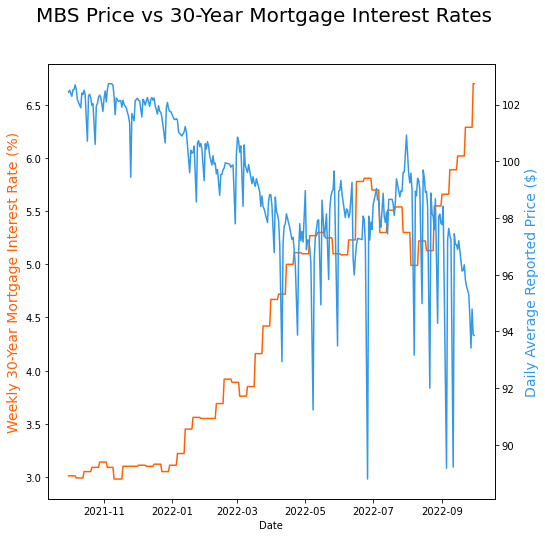

In [120]:
COLOR_INTEREST = "#FF6103"
COLOR_PRICE = "#3399e6"

DATE = merge30['DATE']
price = merge30['price']
MORTGAGE30US = merge30['MORTGAGE30US']
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot(DATE, MORTGAGE30US, color=COLOR_INTEREST)
ax2.plot(DATE, price, color=COLOR_PRICE);

ax1.set_xlabel("Date")
ax1.set_ylabel("Weekly 30-Year Mortgage Interest Rate (%)", color=COLOR_INTEREST, fontsize=14)
ax2.set_ylabel("Daily Average Reported Price ($)", color=COLOR_PRICE, fontsize=14)
fig.suptitle("MBS Price vs 30-Year Mortgage Interest Rates", fontsize=20)

In [109]:
merge15 = pd.merge_asof(df, mtg15)
merge15.head()

,DATE,price,MORTGAGE15US
0,2021-09-30,102.434092,2.28
1,2021-10-01,102.507786,2.28
2,2021-10-03,102.292969,2.28
3,2021-10-04,102.520522,2.28
4,2021-10-05,102.535979,2.28


Text(0.5, 0.98, 'MBS Price vs 15-Year Mortgage Interest Rates')

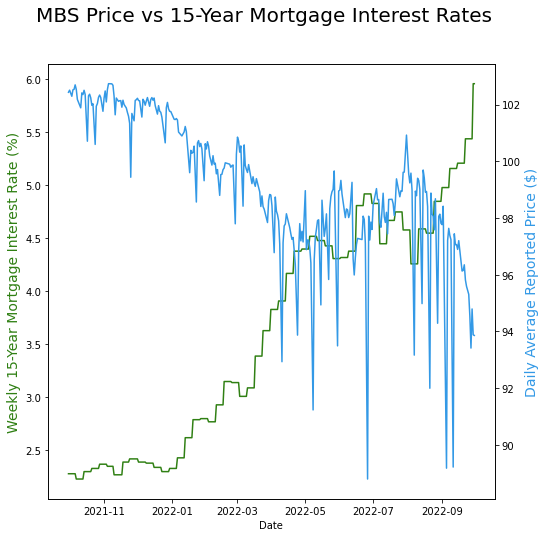

In [125]:
COLOR_INTEREST = "#308014"
COLOR_PRICE = "#3399e6"

DATE = merge15['DATE']
price = merge15['price']
MORTGAGE15US = merge15['MORTGAGE15US']
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot(DATE, MORTGAGE15US, color=COLOR_INTEREST)
ax2.plot(DATE, price, color=COLOR_PRICE);



ax1.set_xlabel("Date")
ax1.set_ylabel("Weekly 15-Year Mortgage Interest Rate (%)", color=COLOR_INTEREST, fontsize=14)
ax2.set_ylabel("Daily Average Reported Price ($)", color=COLOR_PRICE, fontsize=14)
fig.suptitle("MBS Price vs 15-Year Mortgage Interest Rates", fontsize=20)